# <center><a href='https://colab.research.google.com/github/cpge-itc/itc1/blob/main/files/5_graph/3_traversal/bfs/code_bfs.ipynb'>Code : Parcours en largeur <img src=https://colab.research.google.com/assets/colab-badge.svg width=100></a></center>

## Graphe de test

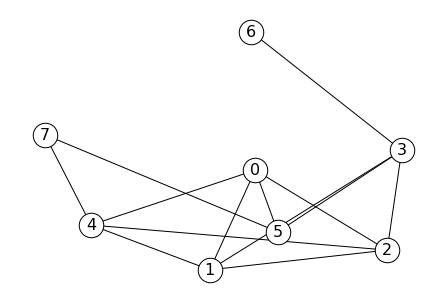

In [1]:
try:
    __import__("cpge")
except ImportError:
    ! pip install git+https://github.com/fortierq/itc-code &> /dev/null
import cpge.graph


G = cpge.graph.random_list()
cpge.graph.draw(G)

## BFS avec file

In [2]:
from collections import deque

def bfs(G, s):
    visited = [False]*len(G)
    file = deque([s])
    while len(file) > 0:
        u = file.pop()
        if not visited[u]:
            print(u, end=" ")
            visited[u] = True
            for v in G[u]:
                file.appendleft(v)

bfs(G, 0)

0 1 2 4 5 3 7 6 

## BFS avec 2 couches

In [3]:
def bfs(G, s):
    visited = [False]*len(G)
    cur, next = [s], []
    while len(cur) + len(next) > 0: # on s'arrête quand les 2 sont vides
        if len(cur) == 0:
            cur, next = next, []
        u = cur.pop()
        if not visited[u]:
            visited[u] = True
            print(u, end=" ")
            for v in G[u]:
                next.append(v)

bfs(G, 0)

0 5 4 2 1 3 7 6 

## Application : calcul de distance

In [4]:
def distances(G, s):
    dist = [-1]*len(G)
    file = deque([(s, 0)])
    while len(file) > 0:
        u, d = file.pop()
        if dist[u] == -1:
            dist[u] = d
            for v in G[u]:
                file.appendleft((v, d + 1))
    return dist

distances(G, 0)

[0, 1, 1, 2, 1, 1, 3, 2]

## Application : calcul de plus court chemin

In [5]:
def bfs(G, s):
    pred = [-1]*len(G)
    file = deque([(s, s)])
    while len(file) > 0:
        u, p = file.pop()
        if pred[u] == -1:
            pred[u] = p
            for v in G[u]:
                file.appendleft((v, u))
    return pred

def path(pred, s, v):
    L = []
    while v != s:
        L.append(v)
        v = pred[v]
    L.append(s)
    return L[::-1] # inverse le chemin

pred = bfs(G, 0)
path(pred, 0, 7)

[0, 4, 7]

## Animation du BFS

In [6]:
cpge.graph.anim_bfs(G)